<h3>WHAT TO PLOT SUMMARY</h3>
recruitment amplitudes of each nerve aff/eff by level (just need percents + rec amp)<br>
difference in recruitment amplitudes between each nerve aff/eff (same)<br>
threshold of recruitment in different electrodes/laterality (same as above)<br>
threshold of recruitment in dorsal columns/cord vs in roots (split by tissue!)<br>
- how does this change laterally?<br>


In [31]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

cdir = 'P:/users/mkj8/sc_modeling/sim4life'
fpath = os.path.join(cdir, 'saved_data_finalmodel')
summary_path = os.path.join(fpath, 'summary_rec_loc.csv')

summary_rec = pd.read_csv(summary_path)

rec_threshold = 10 #set percent recruitment to use for thresholds
max_val = 3000 #for now manually define this, it's the top of the range that was tested for recruitment in plot_analysis_scale
nnames = ['pelvic', 'pudendal', 'sciatic']
lvls = ['L6', 'L7', 'S1']

#layout of the electrode array
elec_layout = [[8, 7, 6, 5, 4, 3, 2, 1], 
    [16, 15, 14, 13, 12, 11, 10, 9], [24, 23, 22, 21, 20, 19, 18, 17]]

In [32]:
#formatting in seaborn: 
dotsize = 10 
alpha = 0.7
sns.set(style="darkgrid", context='talk')
sns.set(rc={'figure.dpi': 150})


<h3>Figure 2</h3>
Afferent and efferent recruitment: <br>
- recruitment amplitudes of each nerve afferent and efferent + by level (eff ever recruited first?) <br>
- difference in recruitment amplitudes between each nerve afferent and efferent <br>

<AxesSubplot:xlabel='spinal_level', ylabel='max_rec'>

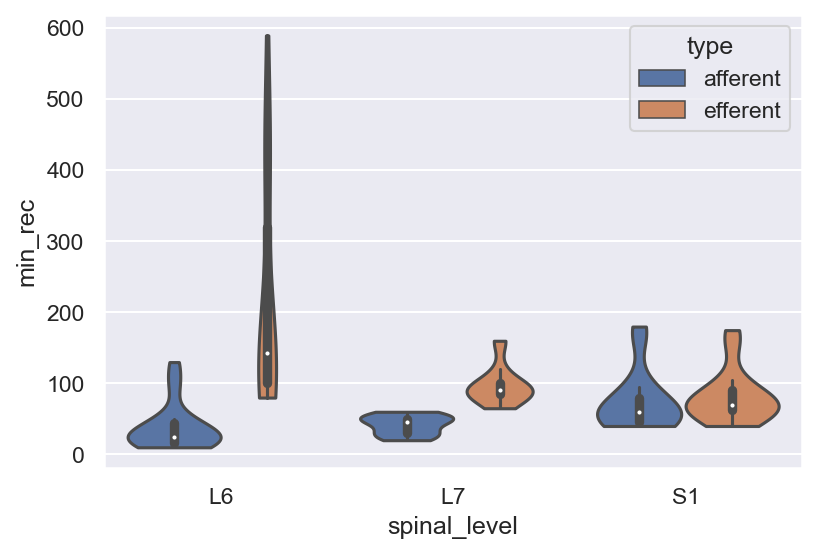

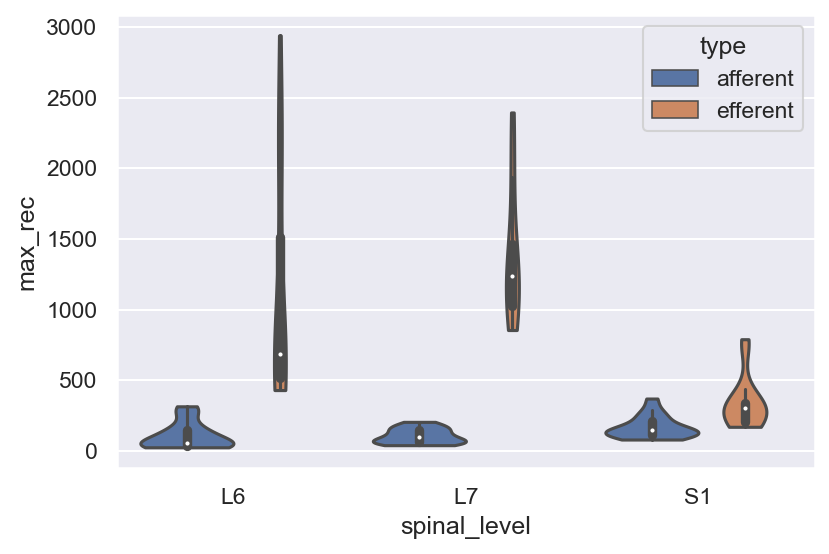

In [33]:
#recruitment amplitude of lowest afferent, efferent portion of any nerve by level (scatter) (could also split rows of array)
pd.options.mode.chained_assignment = None #turns off the warning: this is fine here bc the values are being set
#across all rows not a slice even though there's a slice being taken to calculate the min
tmp = summary_rec[summary_rec['rec_threshold'] == rec_threshold]
tmp['min_rec'] = tmp[['pelvic', 'pudendal', 'sciatic']].min(axis=1)
tmp['max_rec'] = tmp[['pelvic', 'pudendal', 'sciatic']].max(axis=1)

#sns.catplot(x='spinal_level', y='min_rec', data=tmp, hue='type', s = dotsize, alpha=alpha)
sns.violinplot(x='spinal_level', y='min_rec', data=tmp,
            hue='type', s=dotsize, alpha=alpha, cut=0)
plt.figure()
sns.violinplot(x='spinal_level', y='max_rec', data=tmp,
               hue='type', s=dotsize, alpha=alpha, cut=0)
#make a scatter plot of the difference in recruitment for aff v efferent for each nerve



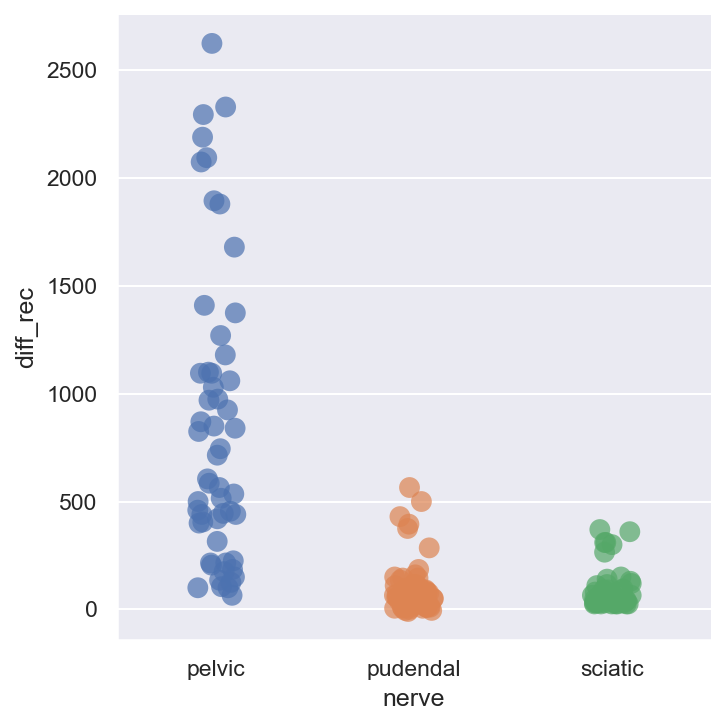

In [34]:
#difference in recruitment amplitudes between each nerve aff and eff
#make dataset
valdiff = []
lbls = []
for lvl in lvls:
    #actually only necessary to split by levels bc the elecs are different
    for elec in tmp.electrode.unique():
        vals = summary_rec[(summary_rec['rec_threshold'] == rec_threshold) & (summary_rec['spinal_level']==lvl) & (summary_rec['electrode'] == elec)][nnames]
        if len(vals) == 0:
            pass
        elif len(vals) != 2: 
            print(lvl, elec)
            raise Exception('not an afferent and efferent row')
        else:
            vals[vals.isna()] = max_val
            valdiff.extend(vals.diff().iloc[-1].to_list())
            lbls.extend(nnames)

tmp_diff = pd.DataFrame(data={'nerve':lbls, 'diff_rec':valdiff})

sns.catplot(x='nerve', y='diff_rec', data=tmp_diff, s=dotsize, alpha=alpha)


<h3>Figure 3</h3>
Focality of stimulation: <br>
- difference between aff/eff thresholds on lateral and medial cord, by level <br>
- similarity between neighboring electrode recruitment <br>
- threshold of recruitment in dorsal columns/cord vs in roots <br>

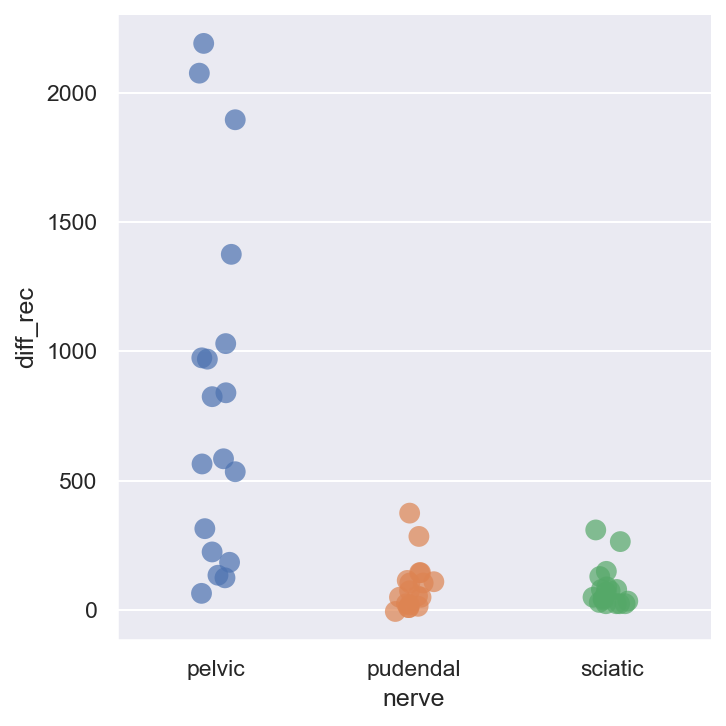

In [35]:
#difference btw afferent, eff thresholds on lateral v medial cord
#for all differencing: if a value is a nan, assign the max value to it. 
lat_cols = [0, 7] #zero index of columns to include
med_cols = [3, 4]

test_sect = lat_cols

#plot something like the nerve scatter plot but by level, for lateral cord and medial
valdiff = []
lbls = []
elec_vals = np.array([[elec_layout[j][i] for i in test_sect] for j in range(len(elec_layout))]).flatten()
elec_vals = np.intersect1d(elec_vals, tmp.electrode.unique())
for lvl in lvls:
    #actually only necessary to split by levels bc the elecs are different
    for elec in elec_vals:
        vals = summary_rec[(summary_rec['rec_threshold'] == rec_threshold) & (
            summary_rec['spinal_level'] == lvl) & (summary_rec['electrode'] == elec)][nnames]
        if len(vals) == 0:
            pass
        elif len(vals) != 2:
            print(lvl, elec)
            raise Exception('not an afferent and efferent row')
        else:
            vals[vals.isna()] = max_val
            valdiff.extend(vals.diff().iloc[-1].to_list())
            lbls.extend(nnames)

tmp_diff = pd.DataFrame(data={'nerve': lbls, 'diff_rec': valdiff})

sns.catplot(x='nerve', y='diff_rec', data=tmp_diff, s=dotsize, alpha=alpha)


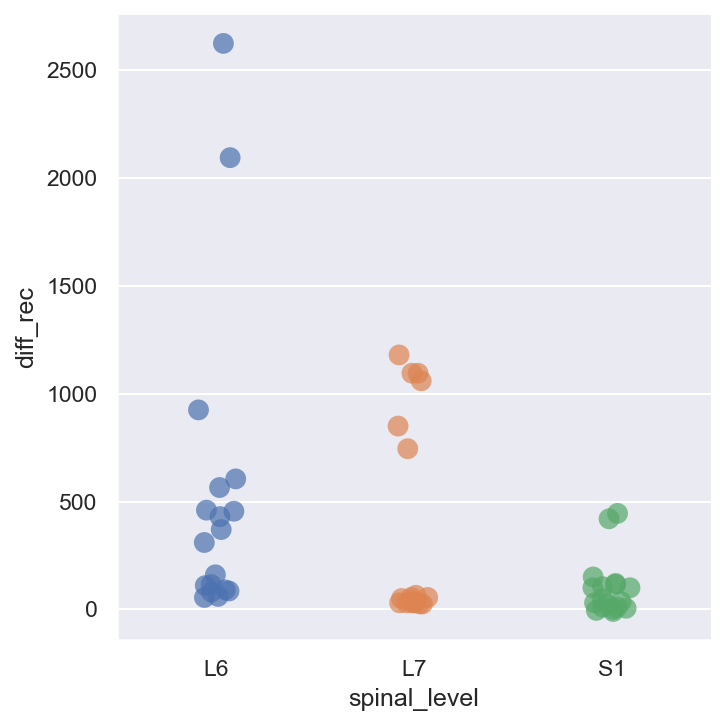

In [36]:
#spinal level
test_sect = med_cols

valdiff = []
lbls = []
elec_vals = np.array([[elec_layout[j][i] for i in test_sect]
                     for j in range(len(elec_layout))]).flatten()
elec_vals = np.intersect1d(elec_vals, tmp.electrode.unique())
for lvl in lvls:
    #actually only necessary to split by levels bc the elecs are different
    for elec in elec_vals:
        vals = summary_rec[(summary_rec['rec_threshold'] == rec_threshold) & (
            summary_rec['spinal_level'] == lvl) & (summary_rec['electrode'] == elec)][nnames]
        if len(vals) == 0:
            pass
        elif len(vals) != 2:
            print(lvl, elec)
            raise Exception('not an afferent and efferent row')
        else:
            vals[vals.isna()] = max_val
            valdiff.extend(vals.diff().iloc[-1].to_list())
            lbls.extend([lvl]*len(nnames))

tmp_diff = pd.DataFrame(data={'spinal_level': lbls, 'diff_rec': valdiff})

sns.catplot(x='spinal_level', y='diff_rec', data=tmp_diff, s=dotsize, alpha=alpha)


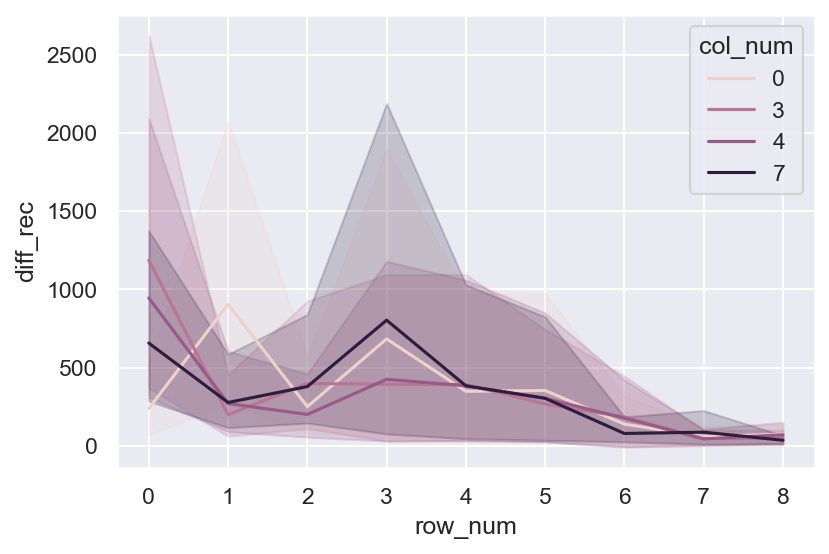

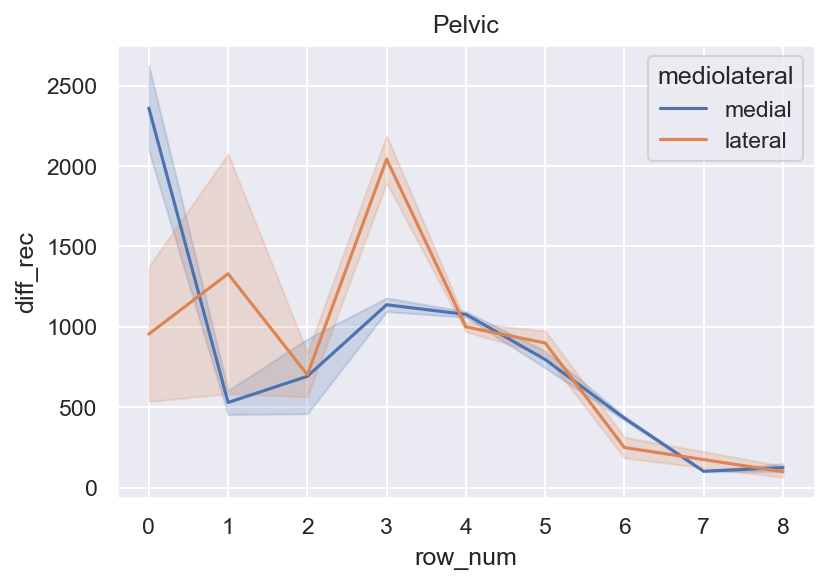

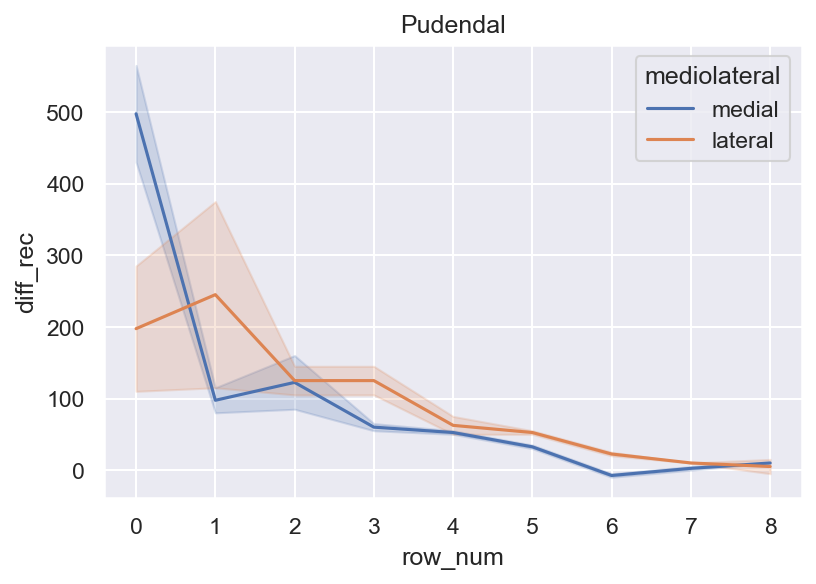

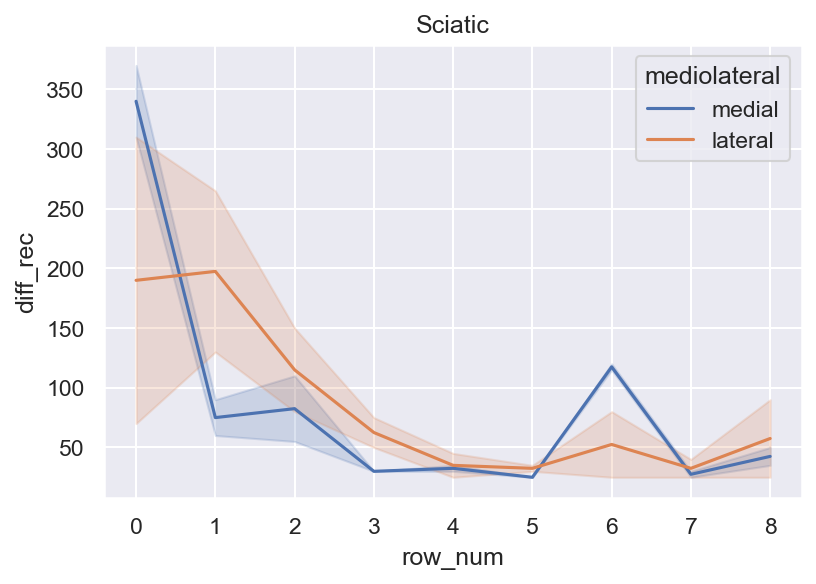

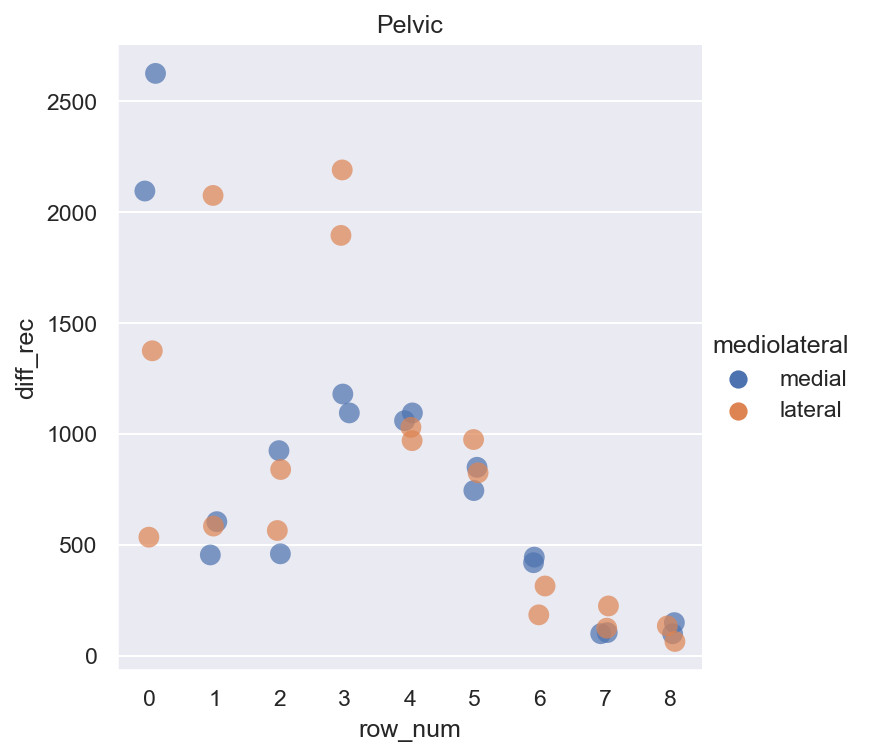

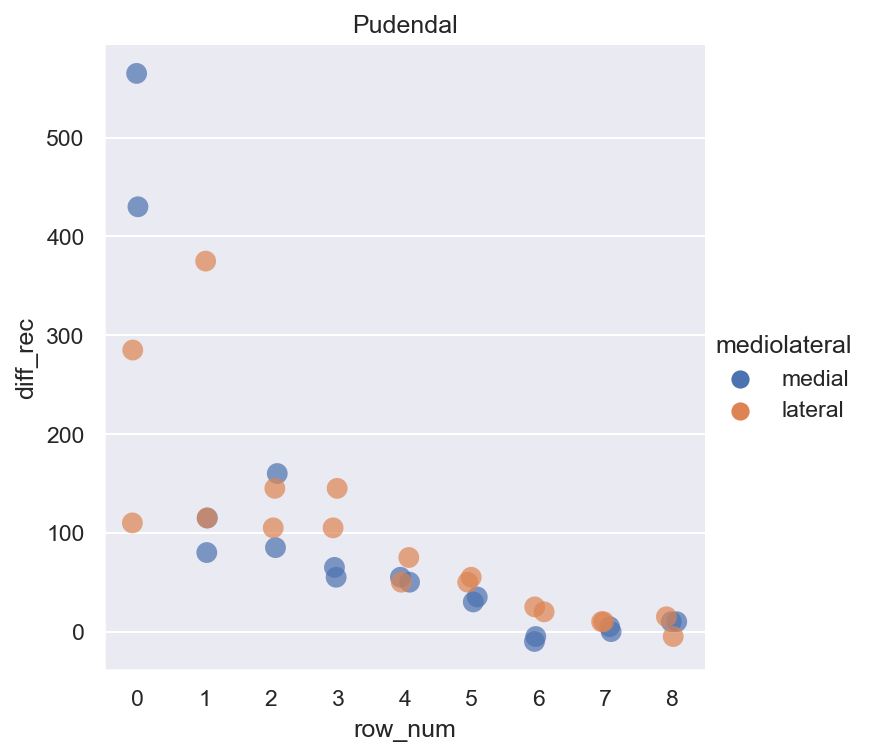

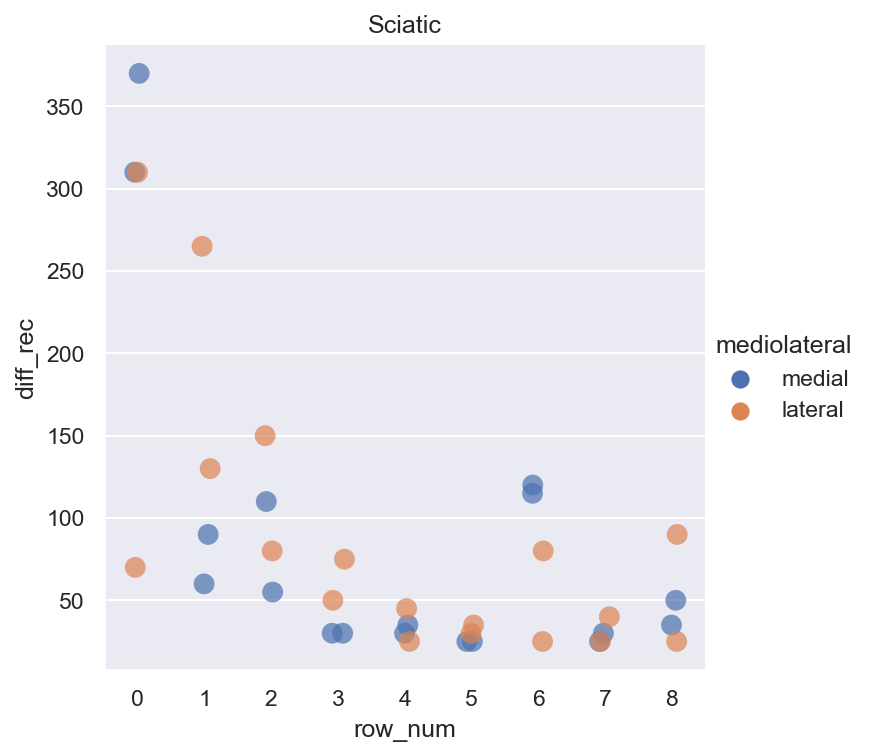

In [37]:
#plot every row going down the array 
#basically renumber so that additional rows continue from L6
# test_sect = med_cols
from turtle import title


row_num = [] #row of the array (1-3 L6, 4-6 L7, 7-9 S1)
col_num = []
valdiff = []
lbls = [] #medial/lateral
nlbls = [] #nerves
elec_vals = np.array([[elec_layout[j][i] for i in med_cols]
                     for j in range(len(elec_layout))]).flatten()
elec_vals_med = np.intersect1d(elec_vals, tmp.electrode.unique())

elec_vals = np.array([[elec_layout[j][i] for i in lat_cols]
                     for j in range(len(elec_layout))]).flatten()
elec_vals_lat = np.intersect1d(elec_vals, tmp.electrode.unique())

for lvl in lvls:
    #actually only necessary to split by levels bc the elecs are different
    for elec in elec_vals_med:
        vals = summary_rec[(summary_rec['rec_threshold'] == rec_threshold) & (
            summary_rec['spinal_level'] == lvl) & (summary_rec['electrode'] == elec)][nnames]
        if len(vals) == 0:
            pass
        elif len(vals) != 2:
            print(lvl, elec)
            raise Exception('not an afferent and efferent row')
        else:

            vals[vals.isna()] = max_val
            valdiff.extend(vals.diff().iloc[-1].to_list())
            lbls.extend(['medial']*len(nnames))
            nlbls.extend(nnames)
            index = [i for i, x in enumerate(
                elec_layout) if elec in x][0] 
            row_num.extend([index + lvls.index(lvl)*3]*len(nnames))
            col_num.extend([elec_layout[index].index(elec)]*len(nnames))
    for elec in elec_vals_lat:
        vals = summary_rec[(summary_rec['rec_threshold'] == rec_threshold) & (
            summary_rec['spinal_level'] == lvl) & (summary_rec['electrode'] == elec)][nnames]
        if len(vals) == 0:
            pass
        elif len(vals) != 2:
            print(lvl, elec)
            raise Exception('not an afferent and efferent row')
        else:
            vals[vals.isna()] = max_val
            valdiff.extend(vals.diff().iloc[-1].to_list())
            lbls.extend(['lateral']*len(nnames))
            nlbls.extend(nnames)
            index = [i for i, x in enumerate(
            elec_layout) if elec in x][0]
            row_num.extend([index + lvls.index(lvl)*3]*len(nnames))
            col_num.extend([elec_layout[index].index(elec)]*len(nnames))


tmp_diff = pd.DataFrame(data={'row_num': row_num, 'diff_rec': valdiff, 'mediolateral':lbls, 'nerve':nlbls, 'col_num':col_num})

# sns.lineplot(x='row_num', y='diff_rec',
#             data=tmp_diff, hue='col_num')
sns.lineplot(x='row_num', y='diff_rec',
             data=tmp_diff, hue='col_num')
#NOTE I think the swap here happens because the lateral one switches which nerve is the relevant difference
plt.figure()
sns.lineplot(x='row_num', y='diff_rec',
             data=tmp_diff[tmp_diff['nerve']=='pelvic'], hue='mediolateral').set(title='Pelvic')
plt.figure()
sns.lineplot(x='row_num', y='diff_rec',
             data=tmp_diff[tmp_diff['nerve'] == 'pudendal'], hue='mediolateral').set(title='Pudendal')
plt.figure()
sns.lineplot(x='row_num', y='diff_rec',
             data=tmp_diff[tmp_diff['nerve']=='sciatic'], hue='mediolateral').set(title='Sciatic')

sns.catplot(x='row_num', y='diff_rec',
            data=tmp_diff[tmp_diff['nerve']=='pelvic'], s=dotsize, alpha=alpha, hue='mediolateral').set(title='Pelvic')
sns.catplot(x='row_num', y='diff_rec',
            data=tmp_diff[tmp_diff['nerve'] == 'pudendal'], s=dotsize, alpha=alpha, hue='mediolateral').set(title='Pudendal')
sns.catplot(x='row_num', y='diff_rec',
            data=tmp_diff[tmp_diff['nerve'] == 'sciatic'], s=dotsize, alpha=alpha, hue='mediolateral').set(title='Sciatic')


<h3>Figure 4</h3>
Recruitment of each nerve by level: <br>
- recruitment threshold as you work your way down the cord in a column of electrodes <br>
- selective recruitment of each nerve, by level <br>
- electrodes more similar to clinical electrodes <br>

<AxesSubplot:xlabel='row', ylabel='sciatic'>

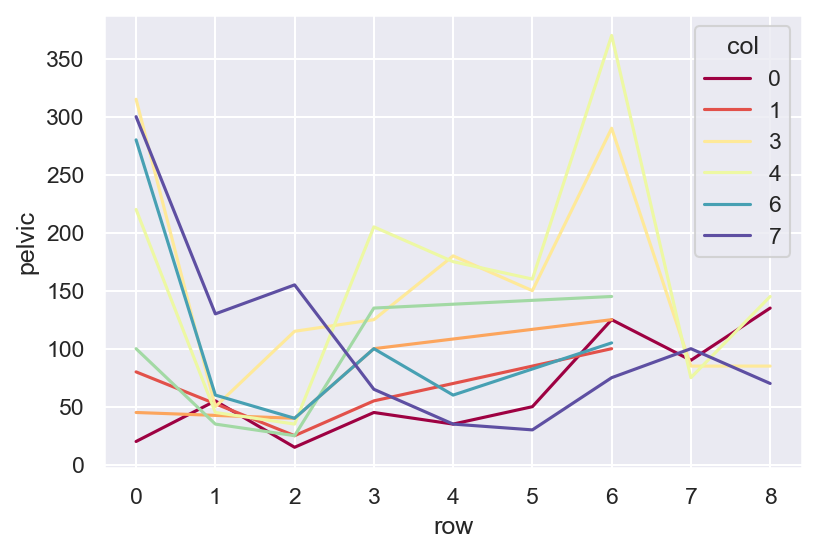

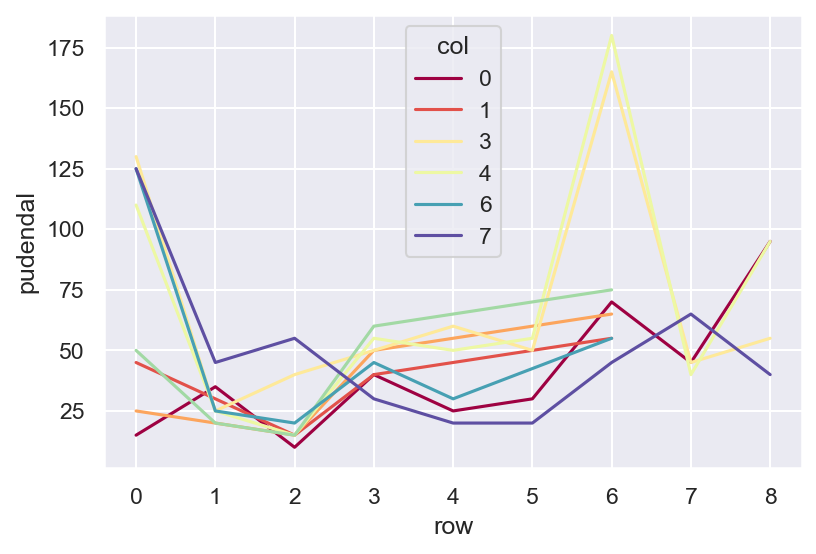

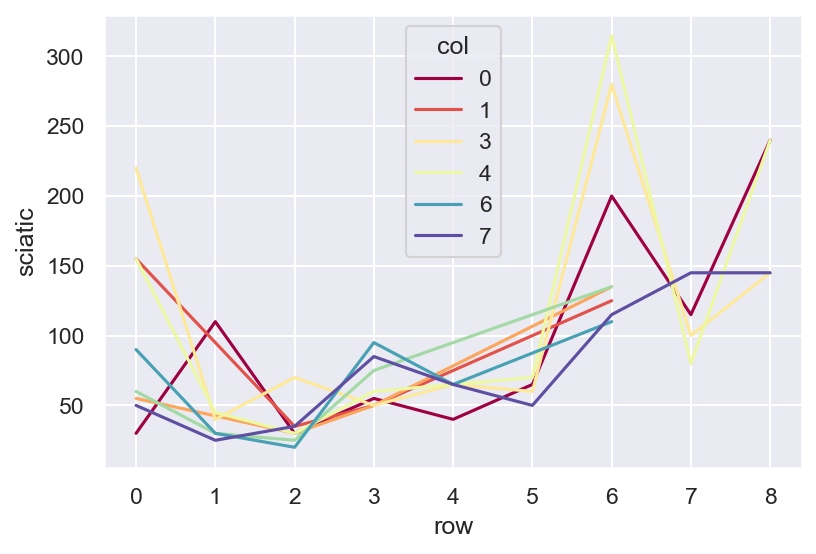

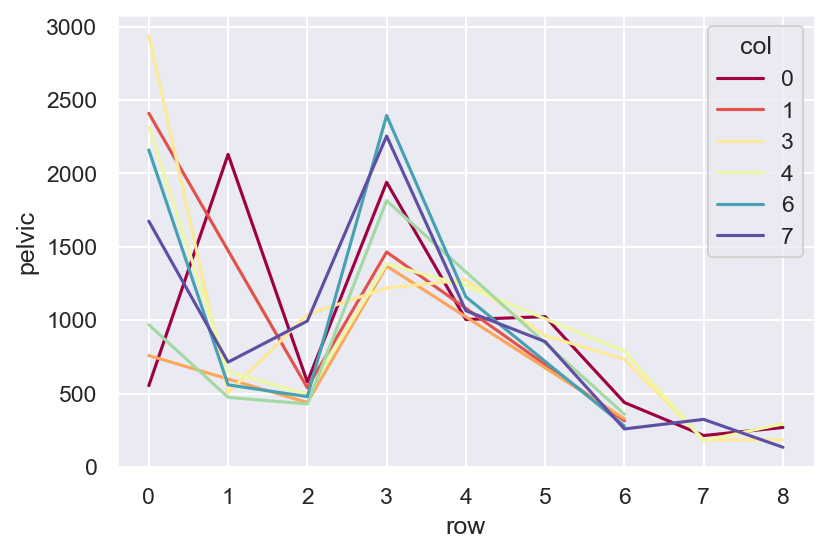

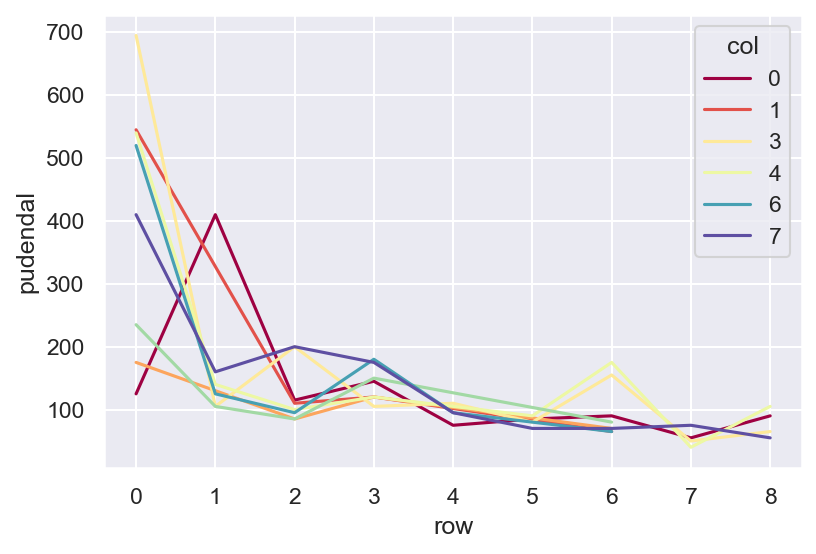

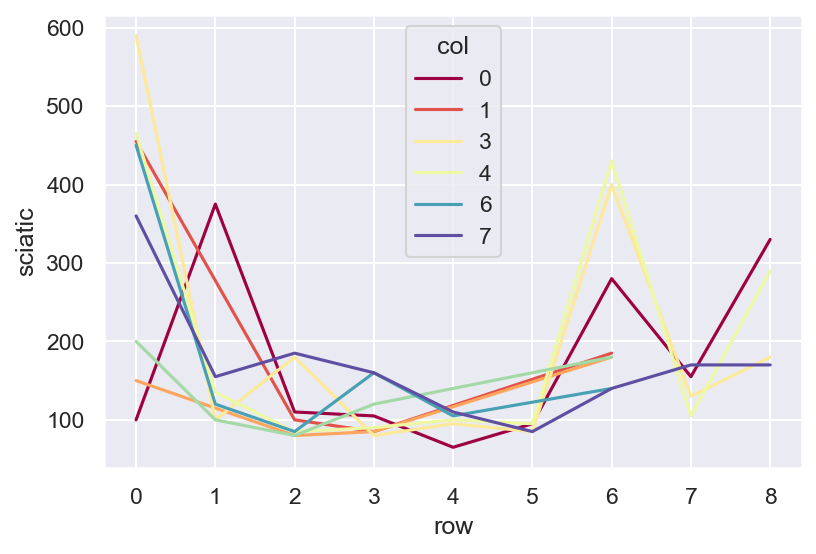

In [38]:
# row_num = [] #row of the array (1-3 L6, 4-6 L7, 7-9 S1)
# col_num = []
# rec_amp = []
# lbls = [] #medial/lateral
# nlbls = [] #nerves

# for i in range(len(summary_rec['electrode'])):
#     index = [j for j, x in enumerate(
#         elec_layout) if summary_rec['electrode'].iloc[i] in x][0]
#     row_num.append(index + lvls.index(summary_rec['spinal_level'].iloc[i])*3)
#     col_num.append(elec_layout[index].index(
#         summary_rec['electrode'].iloc[i]))

# summary_rec['row'] = row_num
# summary_rec['col'] = col_num

#now: go through each of the cases with the correct rec threshold, for a specific nerve, and 
sns.lineplot(data=summary_rec[(summary_rec['rec_threshold']==rec_threshold) & (summary_rec['type']=='afferent')], y='pelvic', x='row', hue='col', palette='Spectral')
plt.figure()
sns.lineplot(data=summary_rec[(summary_rec['rec_threshold']==rec_threshold) & (summary_rec['type']=='afferent')], y='pudendal', x='row', hue='col', palette='Spectral')
plt.figure()
sns.lineplot(data=summary_rec[(summary_rec['rec_threshold']==rec_threshold) & (summary_rec['type']=='afferent')], y='sciatic', x='row', hue='col', palette='Spectral')

plt.figure()
sns.lineplot(data=summary_rec[(summary_rec['rec_threshold']==rec_threshold) & (summary_rec['type']=='efferent')], y='pelvic', x='row', hue='col', palette='Spectral')
plt.figure()
sns.lineplot(data=summary_rec[(summary_rec['rec_threshold']==rec_threshold) & (summary_rec['type']=='efferent')], y='pudendal', x='row', hue='col', palette='Spectral')
plt.figure()
sns.lineplot(data=summary_rec[(summary_rec['rec_threshold']==rec_threshold) & (summary_rec['type']=='efferent')], y='sciatic', x='row', hue='col', palette='Spectral')



(8.5, -0.5)

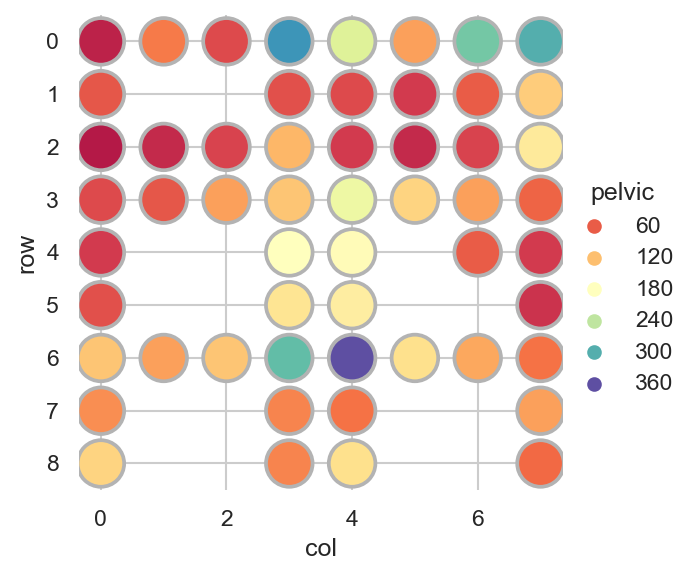

In [47]:
#right here I think it makes sense to do "hot spots" - just do this as a set of grids of electrodes with rec amplitude used to color 
#TODO how to relate this to WHERE the neurons were actually recruited? 

sns.set_theme(style='whitegrid')

n_select = 'pelvic'

g = sns.relplot(data=summary_rec[(summary_rec['rec_threshold'] == rec_threshold) & (summary_rec['type'] == 'afferent')],
                x='col', y='row', hue=n_select, palette='Spectral', edgecolor='.7', height=4, s=100, hue_norm=(0, 360))
g.despine(left=True, bottom=True)
plt.ylim(8.5, -.5)


['pelvic', 'pudendal', 'sciatic']


(8.5, -0.5)

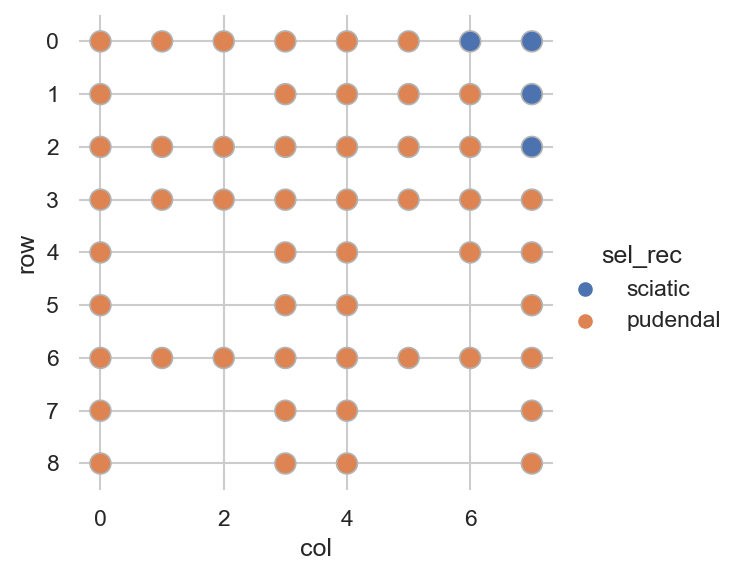

In [40]:
print(nnames)

summary_rec = summary_rec.assign(sel_rec = summary_rec[nnames].idxmin(axis=1))


g = sns.relplot(data=summary_rec[(summary_rec['rec_threshold'] == rec_threshold) & (summary_rec['type'] == 'afferent')],
                x='col', y='row', hue='sel_rec',  edgecolor='.7', height=4, s=100)
g.despine(left=True, bottom=True)
plt.ylim(8.5, -.5)


In [41]:
#selective recruitment
#dynamic range